In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
matplotlib.style.use('ggplot')

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
            i += 1

    pl.show()

In [56]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header = None)
iris = iris.dropna()

1.1 A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination
of features.

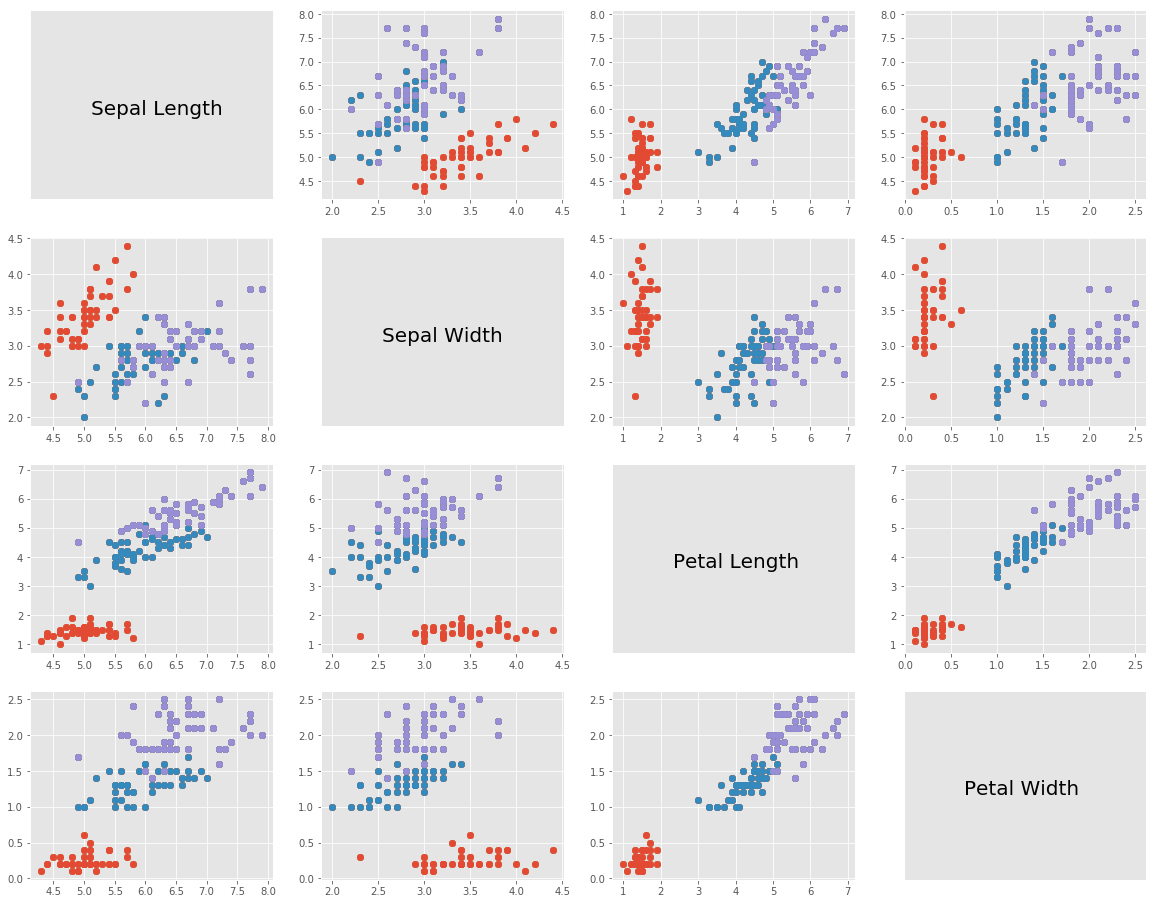

In [57]:
pairs(iris)

1.2 A plot of the linear regression models generated on each pairwise combination of features,
with corresponding model statistics.

In [74]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model

def plot_regression_result(feature1, feature2):
    x = iris[[feature1]]
    y = iris[[feature2]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    
    # Plot outputs
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, regr.predict(x_test), color='blue', linewidth=3)
    
    plt.title(feature1 + ' and ' + feature2)
    plt.xlabel(feature1)
    plt.ylabel(feature2)

    plt.show()
    
    
    # The coefficients
    print('Coefficients: ', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(x_test) - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x_test, y_test))



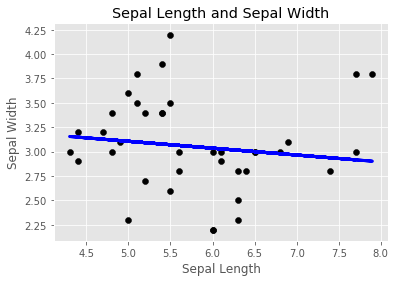

Coefficients:  [[-0.07039927]]
Mean squared error: 0.22
Variance score: -0.01


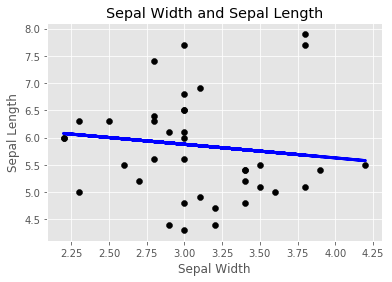

Coefficients:  [[-0.24960199]]
Mean squared error: 0.87
Variance score: -0.01


In [75]:
plot_regression_result('Sepal Length', 'Sepal Width')
plot_regression_result('Sepal Width', 'Sepal Length')

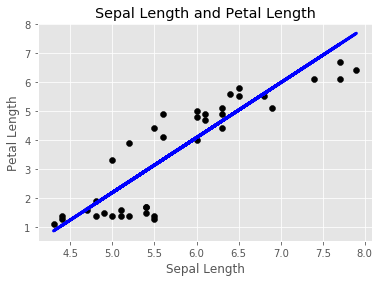

Coefficients:  [[ 1.8882489]]
Mean squared error: 0.83
Variance score: 0.77


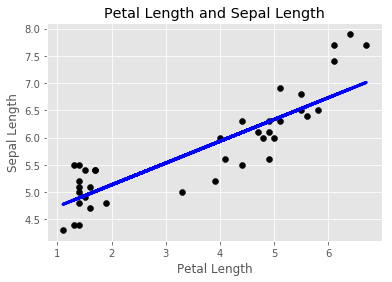

Coefficients:  [[ 0.39977577]]
Mean squared error: 0.20
Variance score: 0.77


In [77]:
plot_regression_result('Sepal Length', 'Petal Length')
plot_regression_result('Petal Length', 'Sepal Length')

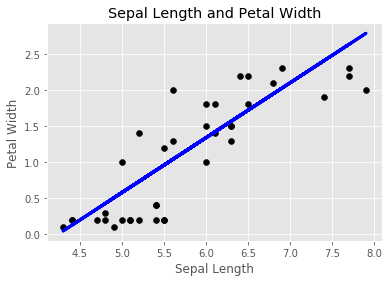

Coefficients:  [[ 0.76086957]]
Mean squared error: 0.19
Variance score: 0.70


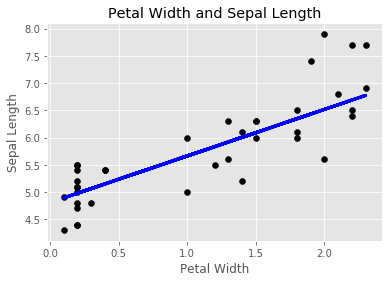

Coefficients:  [[ 0.85495068]]
Mean squared error: 0.26
Variance score: 0.70


In [78]:
plot_regression_result('Sepal Length', 'Petal Width')
plot_regression_result('Petal Width', 'Sepal Length')

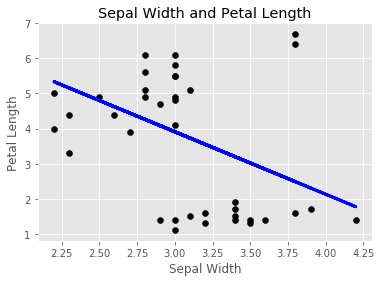

Coefficients:  [[-1.77907296]]
Mean squared error: 3.09
Variance score: 0.13


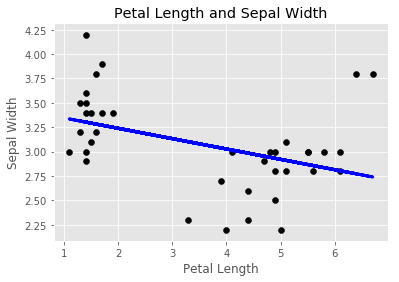

Coefficients:  [[-0.10623586]]
Mean squared error: 0.19
Variance score: 0.14


In [79]:
plot_regression_result('Sepal Width', 'Petal Length')
plot_regression_result('Petal Length', 'Sepal Width')

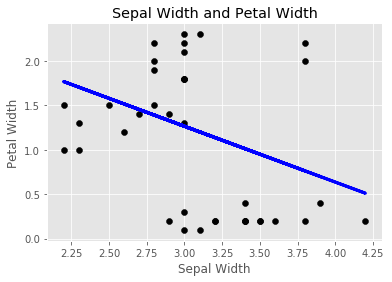

Coefficients:  [[-0.62907387]]
Mean squared error: 0.58
Variance score: 0.10


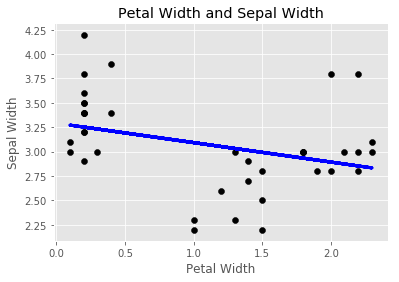

Coefficients:  [[-0.1993667]]
Mean squared error: 0.19
Variance score: 0.13


In [80]:
plot_regression_result('Sepal Width', 'Petal Width')
plot_regression_result('Petal Width', 'Sepal Width')

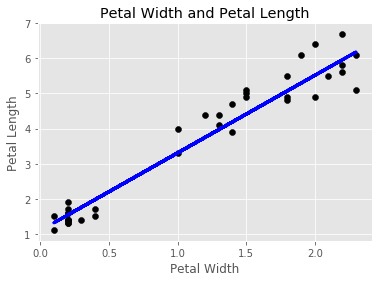

Coefficients:  [[ 2.20829781]]
Mean squared error: 0.20
Variance score: 0.94


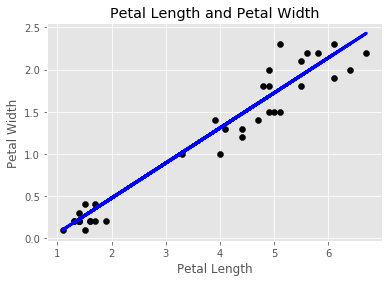

Coefficients:  [[ 0.41608688]]
Mean squared error: 0.04
Variance score: 0.94


In [81]:
plot_regression_result('Petal Width', 'Petal Length')
plot_regression_result('Petal Length', 'Petal Width')

### Questions response:

1. Based upon the linear models you generated, which pair of features appear to be most
predictive for one another? Note that you can answer this question based upon the output
provided for the linear models.

Answer: 'Petal Width' and 'Petal Length' are the most predictive features for one another. The variance score > 0.9, while all other combinations are much lower than this two. Also, 'Petal Width' and 'Petal Length' have the least square mean square error. 

2. Suppose you tried to generate a classification model on this dataset, but only after remov-
ing the feature that you were best able to predict based upon other features. How would
removing this feature affect the classification performance?

Answer: 'Petal Width' is the best able to predict from the other three features, meaning that it has highest variance score with other features. Thus, the classifications with and without this feature would be cloest. Removing this feature affect least to the classification, so the f